In [1]:
'''
<랜덤포레스트(Random Forest)>

- 여러개의 의사결정나무(Decision Tree)를 묶어서 하나의 모델로 사용
- 학습 및 테스트 순서
1. 데이터 생성
2. 전처리
3. 학습 및 테스트 데이터 생성
4. 학습 모델 생성
5. 모델 예측(테스트)
6. 정확도 산출(평가)

- 사용 데이터 : 타이타닉 생존율 분석
- 독립변수 : 연속형 데이터 (Pclass(객실등급), age_sex(성별))
- 종속변수 : 범주형 데이터 (Survived(생존여부))
'''

'\n<랜덤포레스트(Random Forest)>\n\n- 여러개의 의사결정나무(Decision Tree)를 묶어서 하나의 모델로 사용\n- 학습 및 테스트 순서\n1. 데이터 생성\n2. 전처리\n3. 학습 및 테스트 데이터 생성\n4. 학습 모델 생성\n5. 모델 예측(테스트)\n6. 정확도 산출(평가)\n\n- 사용 데이터 : 타이타닉 생존율 분석\n- 독립변수 : 연속형 데이터 (Pclass(객실등급), age_sex(성별))\n- 종속변수 : 범주형 데이터 (Survived(생존여부))\n'

### 예시1 - 사람의 키와 머리카락의 길이로 성별 예측
- 종속변수 : 성별
- 독립변수 : 키, 머리카락 길이

In [2]:
### 랜덤포레스트 라이브러리
# 모델 라이브러리
from sklearn.ensemble import RandomForestClassifier

# 학습 및 테스트 데이터 추출을 위한 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd

# 모델 선택 알고리즘
from sklearn import model_selection

# 평가 라이브러리
from sklearn.metrics._scorer import accuracy_scorer

In [25]:
### 데이터 생성하기
file = 'https://raw.githubusercontent.com/pykwon/python/master/testdata_utf8/titanic_data.csv'
df = pd.read_csv(file)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
print(df.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [27]:
# 결측치 처리하기
# 사용할 독립변수를 기준으로 결측치가 있는 모든 행 삭제하기
df = df.dropna(subset=['Pclass','Age','Sex'])
df.shape

(714, 12)

In [28]:
# 사용할 독립변수 추출하기
# Sex : 숫자값으로 변경시켜주기
# Pclass : 등급별 원핫인코딩
df_x = df[['Pclass','Age','Sex']].reset_index(drop=True)
df_x.head(3)

,Pclass,Age,Sex
0,3,22.0,male
1,1,38.0,female
2,3,26.0,female


In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [30]:
### 성별 데이터를 정수값 0과 1로 변환하기
df_x.loc[ : ,'Sex'] = LabelEncoder().fit_transform(df_x['Sex'])
df_x.head(3)

,Pclass,Age,Sex
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0


In [31]:
df_x2 = pd.DataFrame(OneHotEncoder().fit_transform(df_x['Pclass'].values[ : , np.newaxis]).toarray(),
                     columns = ['f_class','s_class','t_class'], index = df_x.index)
df_x2.head(3)

,f_class,s_class,t_class
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0


In [32]:
df_x = pd.concat([df_x, df_x2], axis=1)
df_x

,Pclass,Age,Sex,f_class,s_class,t_class
0,3,22.0,1,0.0,0.0,1.0
1,1,38.0,0,1.0,0.0,0.0
2,3,26.0,0,0.0,0.0,1.0
3,1,35.0,0,1.0,0.0,0.0
4,3,35.0,1,0.0,0.0,1.0
...,...,...,...,...,...,...
709,3,39.0,0,0.0,0.0,1.0
710,2,27.0,1,0.0,1.0,0.0
711,1,19.0,0,1.0,0.0,0.0
712,1,26.0,1,1.0,0.0,0.0


In [33]:
# 종속변수 추출하기
df_y = df['Survived']
df_y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [34]:
### 학습 데이터와 테스트 데이터 만들기
# 추출기준 : 학습 데이터 70% , 테스트 데이터 30% 
# test_size 디폴트 추출기준 : 0.25%
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.3)
print('train_x =', len(train_x))
print('train_y =', len(train_y))
print('test_x =', len(test_x))
print('test_y =', len(test_y))

train_x = 499
train_y = 499
test_x = 215
test_y = 215


In [35]:
### 학습 모델 생성하기
# 모델 객체 생성하기
# n_estimators : 사용할 트리 갯수 지정
# criterion : 균형잡힌 트리로 분리하기
model = RandomForestClassifier(n_estimators=500, criterion='entropy')

# 학습모델 생성하기
fit_model = model.fit(train_x, train_y)

# 한번에 객체생성과 학습모델 생성은 아래와같이 붙혀서 동일함
print(fit_model)

RandomForestClassifier(criterion='entropy', n_estimators=500)


In [36]:
### 모델 테스트(예측)하기
pred = fit_model.predict(test_x)
print('예측값 = \n', pred)
print('---------------------------------------------------------------------------')

# ravel() : 2차원 행렬의 데이터를 1차원 리스트로 처리
print('실제값 = \n', test_y.ravel())

예측값 = 
 [1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1
 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0
 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0
 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0]
---------------------------------------------------------------------------
실제값 = 
 [0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0
 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1
 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0]


In [37]:
### 모델 평가하기 : 정확도 확인하기
from sklearn.metrics import accuracy_score

# 계산에 의한 정확도 확인
print('정확도(accuracy_score) =', sum(test_y == pred) / len(test_y))

# 라이브러리를 이용한 정확도 확인
print('Lib 정확도(accuracy_score) =', accuracy_score(test_y, pred))

정확도(accuracy_score) = 0.7674418604651163
Lib 정확도(accuracy_score) = 0.7674418604651163


### 병렬처리 vs 직렬처리
- 병렬처리(RandomForest 모델)
- 직렬처리(Boosting 방식)

In [64]:
### 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# 직렬처리 라이브러리
# pip install xgboost
import xgboost as xgb

In [65]:
### 데이터 생성
iris = datasets.load_iris()

### 데이터 프레임 변환
data = pd.DataFrame({
    'sepal length' : iris.data[ : ,0],
    'sepal width' : iris.data[ : ,1],
    'petal length' : iris.data[ : ,2],    
    'petall width' : iris.data[ : ,3],    
    'species' : iris.target
})

# 독립변수(x)
x = data[['sepal length', 'sepal width', 'petal length', 'petall width']]

# 종속변수(y)
y = data['species']

In [66]:
### 학습 데이터 70% 학습 데이터 30% 분류하기
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3, random_state=123)

### 병렬처리방식

In [67]:
### 학습 모델 생성하기
# 병렬 처리방식 객체생성
model = RandomForestClassifier(n_estimators=100)

# 학습모델 생성
fit_model = model.fit(x_train, y_train)

print(fit_model)

RandomForestClassifier()


In [68]:
### 모델 테스트(예측)하기
pred = fit_model.predict(x_test)
print('예측값 = \n', pred)
print('---------------------------------------------------------------------------')

# ravel() : 2차원 행렬의 데이터를 1차원 리스트로 처리
print('실제값 = \n', y_test.ravel())

예측값 = 
 [1 2 2 1 0 1 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 1 0 2 0 0 0 2 2 0 2 1 0 0 1 1 2
 0 0 1 1 0 2 2 2]
---------------------------------------------------------------------------
실제값 = 
 [1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2]


In [69]:
### 모델 평가하기 : 정확도 확인하기
from sklearn.metrics import accuracy_score

# 계산에 의한 정확도 확인
print('정확도(accuracy_score) =', sum(y_test == pred) / len(y_test))

# 라이브러리를 이용한 정확도 확인
print('Lib 정확도(accuracy_score) =', accuracy_score(y_test, pred))

정확도(accuracy_score) = 0.9333333333333333
Lib 정확도(accuracy_score) = 0.9333333333333333


### 직렬처리방식

In [71]:
### 학습 모델 생성하기
# 직렬 처리방식 객체생성
# - booster : 의사결정 기반 모형(gbtree), 선형모형(linear) 둘중 한가지 사용
# - max_depth : 과적합 방지를 위해 사용(default : 6, 보통 3~10 사이 값 사용)
model = xgb.XGBClassifier(booster='gbtree', max_depth=4, n_estimators=100)

# 학습모델 생성
fit_model = model.fit(x_train, y_train)

print(fit_model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)


In [72]:
### 모델 테스트(예측)하기
pred = fit_model.predict(x_test)
print('예측값 = \n', pred)
print('---------------------------------------------------------------------------')

# ravel() : 2차원 행렬의 데이터를 1차원 리스트로 처리
print('실제값 = \n', y_test.ravel())

예측값 = 
 [1 2 2 1 0 1 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 1 0 2 0 0 0 2 2 0 2 1 0 0 1 1 2
 0 0 1 1 0 2 2 2]
---------------------------------------------------------------------------
실제값 = 
 [1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2]


In [73]:
### 모델 평가하기 : 정확도 확인하기
from sklearn.metrics import accuracy_score

# 계산에 의한 정확도 확인
print('정확도(accuracy_score) =', sum(y_test == pred) / len(y_test))

# 라이브러리를 이용한 정확도 확인
print('Lib 정확도(accuracy_score) =', accuracy_score(y_test, pred))

정확도(accuracy_score) = 0.9333333333333333
Lib 정확도(accuracy_score) = 0.9333333333333333


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

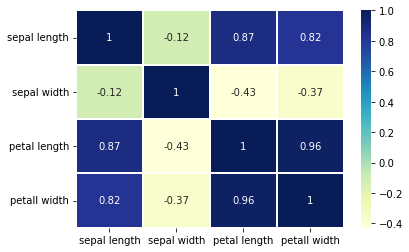

In [75]:
### 상관관계도
data2 = data[['sepal length', 'sepal width', 'petal length', 'petall width']]
sns.heatmap(data2.corr(), annot=True, cmap='YlGnBu', linewidths=0.1)
plt.show()

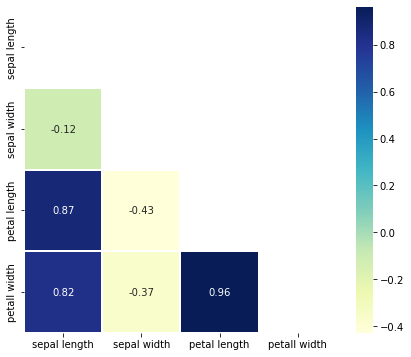

In [84]:
fig, ax = plt.subplots(1, 1, figsize = (7,6))

mask = np.zeros_like(data2.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data2.corr(), annot=True, cmap='YlGnBu', linewidths=0.1, mask=mask)
plt.show()